# ANALISIS DE CRIMINALIDAD EN PERU UN ESTUDIO DE LOS ULTIMOS 4 AÑOS

In [2]:
import pandas as pd
import os

# Ruta local en tu Mac donde tienes los archivos CSV
folder_path = r'C:\Users\Workspace2\Criminalidad_peru\Analisis_delitos_peru'

# Lista de archivos CSV
file_names = ['delitos_2019.csv', 'delitos_2020.csv', 'delitos_2021.csv', 'delitos_2022.csv', 'delitos_2023.csv']

# Crear una lista vacía para almacenar cada DataFrame
dataframes = []

# Cargar y agregar cada archivo CSV en la lista
for file in file_names:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Concatenar todos los DataFrames en uno solo
df_delitos = pd.concat(dataframes, ignore_index=True)

# Ver las primeras filas para confirmar la unión
df_delitos.head()

,periodo_denuncia,anio_denuncia,Fecha_descarga,distrito_fiscal,especialidad,tipo_caso,generico,subgenerico,articulo,des_articulo,cantidad,ubigeo_pjfs,dpto_pjfs,prov_pjfs,dist_pjfs,fecha_corte,fecha_descarga
0,ENERO - DICIEMBRE,2019,13/01/2020,AMAZONAS,PENAL,DENUNCIA,CONTRA EL HONOR,CONTRA EL HONOR (Sin especificar delito subgen...,S/Art,CONTRA EL HONOR,4,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,14/06/2023,NaN
1,ENERO - DICIEMBRE,2019,13/01/2020,AMAZONAS,PENAL,DENUNCIA,CONTRA EL HONOR,"INJURIA,CALUMNIA Y DIFAMACION",130,Injuria,1,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,14/06/2023,NaN
2,ENERO - DICIEMBRE,2019,13/01/2020,AMAZONAS,PENAL,DENUNCIA,CONTRA EL HONOR,"INJURIA,CALUMNIA Y DIFAMACION",131,Calumnia,2,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,14/06/2023,NaN
3,ENERO - DICIEMBRE,2019,13/01/2020,AMAZONAS,PENAL,DENUNCIA,CONTRA EL HONOR,"INJURIA,CALUMNIA Y DIFAMACION",132,Difamación,14,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,14/06/2023,NaN
4,ENERO - DICIEMBRE,2019,13/01/2020,AMAZONAS,PENAL,DENUNCIA,CONTRA EL HONOR,"INJURIA,CALUMNIA Y DIFAMACION",S/Art,"INJURIA, CALUMNIA Y DIFAMACIÓN",1,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,14/06/2023,NaN


### Limpieza de datos

In [3]:
# Ver la estructura del DataFrame
df_delitos.info()

# Describir estadísticas numéricas
df_delitos.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48444 entries, 0 to 48443
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   periodo_denuncia  48444 non-null  object
 1   anio_denuncia     48444 non-null  int64 
 2   Fecha_descarga    39412 non-null  object
 3   distrito_fiscal   48444 non-null  object
 4   especialidad      48444 non-null  object
 5   tipo_caso         48444 non-null  object
 6   generico          48444 non-null  object
 7   subgenerico       48444 non-null  object
 8   articulo          48444 non-null  object
 9   des_articulo      48444 non-null  object
 10  cantidad          48444 non-null  int64 
 11  ubigeo_pjfs       48444 non-null  int64 
 12  dpto_pjfs         48444 non-null  object
 13  prov_pjfs         48444 non-null  object
 14  dist_pjfs         48444 non-null  object
 15  fecha_corte       48444 non-null  object
 16  fecha_descarga    9032 non-null   object
dtypes: int64(3),

,anio_denuncia,cantidad,ubigeo_pjfs
count,48444.000000,48444.000000,48444.000000
mean,2020.998080,106.533936,127293.956568
std,1.372951,861.644758,65764.903439
min,2019.000000,1.000000,10101.000000
25%,2020.000000,2.000000,70106.000000
50%,2021.000000,5.000000,140101.000000
75%,2022.000000,24.000000,170101.000000
max,2023.000000,83059.000000,250101.000000


In [4]:
# Eliminar la columna 'fecha_descarga'
df_delitos.drop(columns=['fecha_descarga'], inplace=True)

# Verificar que la columna ha sido eliminada
df_delitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48444 entries, 0 to 48443
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   periodo_denuncia  48444 non-null  object
 1   anio_denuncia     48444 non-null  int64 
 2   Fecha_descarga    39412 non-null  object
 3   distrito_fiscal   48444 non-null  object
 4   especialidad      48444 non-null  object
 5   tipo_caso         48444 non-null  object
 6   generico          48444 non-null  object
 7   subgenerico       48444 non-null  object
 8   articulo          48444 non-null  object
 9   des_articulo      48444 non-null  object
 10  cantidad          48444 non-null  int64 
 11  ubigeo_pjfs       48444 non-null  int64 
 12  dpto_pjfs         48444 non-null  object
 13  prov_pjfs         48444 non-null  object
 14  dist_pjfs         48444 non-null  object
 15  fecha_corte       48444 non-null  object
dtypes: int64(3), object(13)
memory usage: 5.9+ MB


In [5]:
# Convertir las columnas de fecha a tipo datetime con el formato correcto
df_delitos['Fecha_descarga'] = pd.to_datetime(df_delitos['Fecha_descarga'], errors='coerce', dayfirst=True)
df_delitos['fecha_corte'] = pd.to_datetime(df_delitos['fecha_corte'], errors='coerce', dayfirst=True)

# Verificar los tipos de datos después de la conversión
print(df_delitos.dtypes)

periodo_denuncia            object
anio_denuncia                int64
Fecha_descarga      datetime64[ns]
distrito_fiscal             object
especialidad                object
tipo_caso                   object
generico                    object
subgenerico                 object
articulo                    object
des_articulo                object
cantidad                     int64
ubigeo_pjfs                  int64
dpto_pjfs                   object
prov_pjfs                   object
dist_pjfs                   object
fecha_corte         datetime64[ns]
dtype: object


In [6]:
# Verificar valores nulos en el DataFrame
null_counts = df_delitos.isnull().sum()
print(null_counts[null_counts > 0])

Fecha_descarga    9032
fecha_corte       9032
dtype: int64


In [7]:
# Ver las primeras filas del DataFrame
print(df_delitos.head())

    periodo_denuncia  anio_denuncia Fecha_descarga distrito_fiscal  \
0  ENERO - DICIEMBRE           2019     2020-01-13        AMAZONAS   
1  ENERO - DICIEMBRE           2019     2020-01-13        AMAZONAS   
2  ENERO - DICIEMBRE           2019     2020-01-13        AMAZONAS   
3  ENERO - DICIEMBRE           2019     2020-01-13        AMAZONAS   
4  ENERO - DICIEMBRE           2019     2020-01-13        AMAZONAS   

  especialidad tipo_caso         generico  \
0        PENAL  DENUNCIA  CONTRA EL HONOR   
1        PENAL  DENUNCIA  CONTRA EL HONOR   
2        PENAL  DENUNCIA  CONTRA EL HONOR   
3        PENAL  DENUNCIA  CONTRA EL HONOR   
4        PENAL  DENUNCIA  CONTRA EL HONOR   

                                         subgenerico articulo  \
0  CONTRA EL HONOR (Sin especificar delito subgen...    S/Art   
1                      INJURIA,CALUMNIA Y DIFAMACION      130   
2                      INJURIA,CALUMNIA Y DIFAMACION      131   
3                      INJURIA,CALUMNIA Y DIFAMA

### ANALISIS EXPLORATORIO

In [8]:
# Estadísticas descriptivas
df_delitos.describe()

,anio_denuncia,Fecha_descarga,cantidad,ubigeo_pjfs,fecha_corte
count,48444.000000,39412,48444.000000,48444.000000,39412
mean,2020.998080,2021-07-24 22:56:58.410636544,106.533936,127293.956568,2023-06-14 18:17:54.190601728
min,2019.000000,2020-01-13 00:00:00,1.000000,10101.000000,2023-06-14 00:00:00
25%,2020.000000,2021-01-08 00:00:00,2.000000,70106.000000,2023-06-15 00:00:00
50%,2021.000000,2022-01-10 00:00:00,5.000000,140101.000000,2023-06-15 00:00:00
75%,2022.000000,2022-01-10 00:00:00,24.000000,170101.000000,2023-06-15 00:00:00
max,2023.000000,2023-01-06 00:00:00,83059.000000,250101.000000,2023-06-15 00:00:00
std,1.372951,NaN,861.644758,65764.903439,NaN


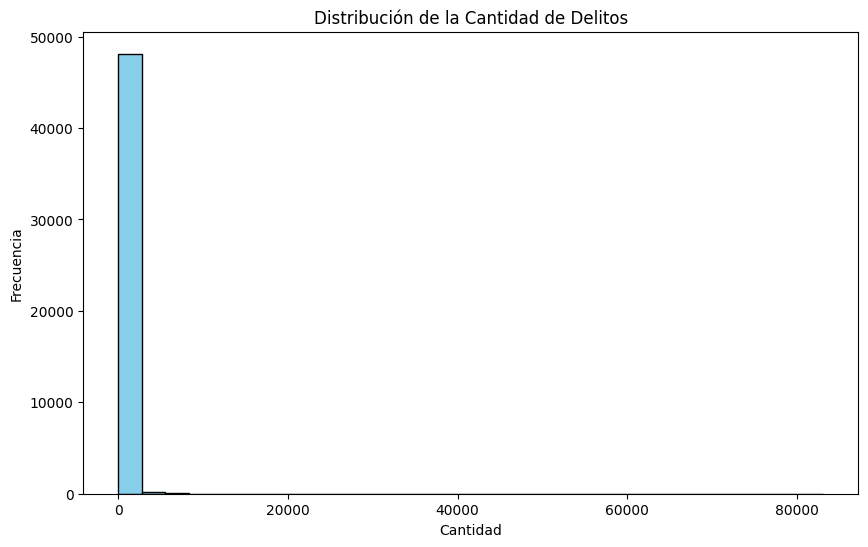

In [9]:
import matplotlib.pyplot as plt

# Histograma para la cantidad de delitos
plt.figure(figsize=(10, 6))
df_delitos['cantidad'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de la Cantidad de Delitos')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()


#### Analisis de valores atípicos en cantidad

In [10]:
# Ver estadísticas descriptivas de la columna 'cantidad'
df_delitos['cantidad'].describe()


count    48444.000000
mean       106.533936
std        861.644758
min          1.000000
25%          2.000000
50%          5.000000
75%         24.000000
max      83059.000000
Name: cantidad, dtype: float64

In [11]:
# Definir un umbral para valores altos en 'cantidad'
umbral = df_delitos['cantidad'].quantile(0.95)

# Filtrar los datos para ver solo los casos con alta cantidad
df_alta_cantidad = df_delitos[df_delitos['cantidad'] > umbral]

Este código ayuda a encontrar y separar los registros con cantidades de delitos inusualmente altas.
Primero, calcula un valor límite (umbral) que representa el 5% de los valores más altos de todos los datos.
Luego, selecciona solo esos casos de cantidad elevada, para que podamos analizarlos y ver si tienen patrones especiales o están asociados a ciertos tipos de delitos.
Es una forma de concentrarnos en los valores "extremos" sin que el resto de datos más comunes los oculte.

In [12]:
# Ver los valores únicos y su frecuencia en la columna 'subgenerico' para los datos con alta cantidad
df_alta_cantidad['subgenerico'].value_counts()


subgenerico
LESIONES                                                                            509
HURTO                                                                               343
DELITO DE PELIGRO COMUN                                                             171
ROBO                                                                                166
OMISION DE ASISTENCIA FAMILIAR                                                      158
VIOLACION DE LA LIBERTAD SEXUAL                                                     131
USURPACION                                                                          120
DELITOS COMETIDOS POR PARTICULARES                                                  108
ESTAFA Y OTRAS DEFRAUDACIONES                                                       105
DAÑOS                                                                                96
CONTRA LA SALUD PUBLICA (CONTAMINACION Y PROPAGACION, TRAFICO ILICITO DE DROGAS)     77
FALSIFICACION DE DOC

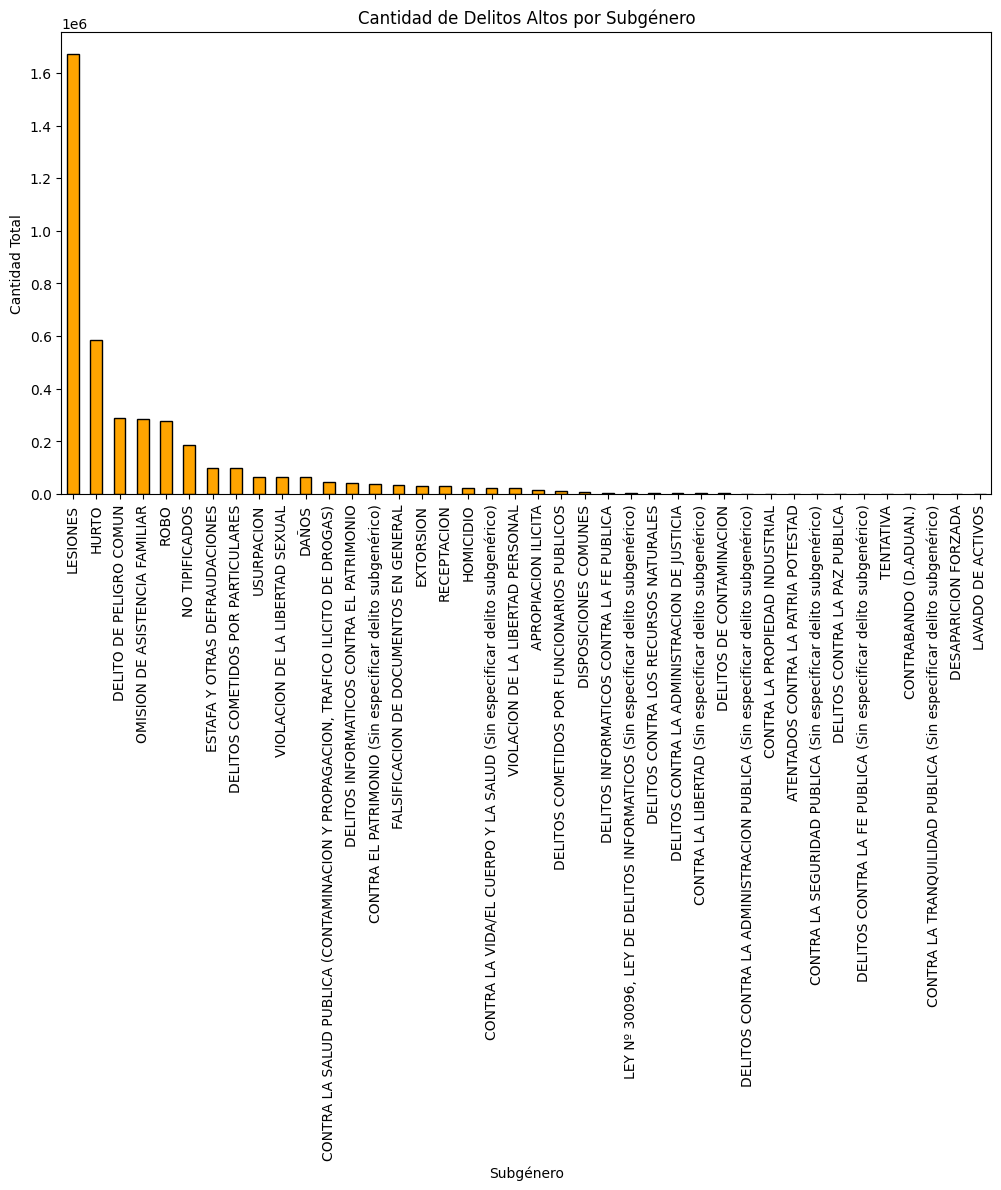

In [13]:
# Gráfico de barras para ver la cantidad total por 'subgenerico' en los datos filtrados
plt.figure(figsize=(12, 6))
df_alta_cantidad.groupby('subgenerico')['cantidad'].sum().sort_values(ascending=False).plot(kind='bar', color='orange', edgecolor='black')
plt.title('Cantidad de Delitos Altos por Subgénero')
plt.xlabel('Subgénero')
plt.ylabel('Cantidad Total')
plt.xticks(rotation=90)
plt.show()


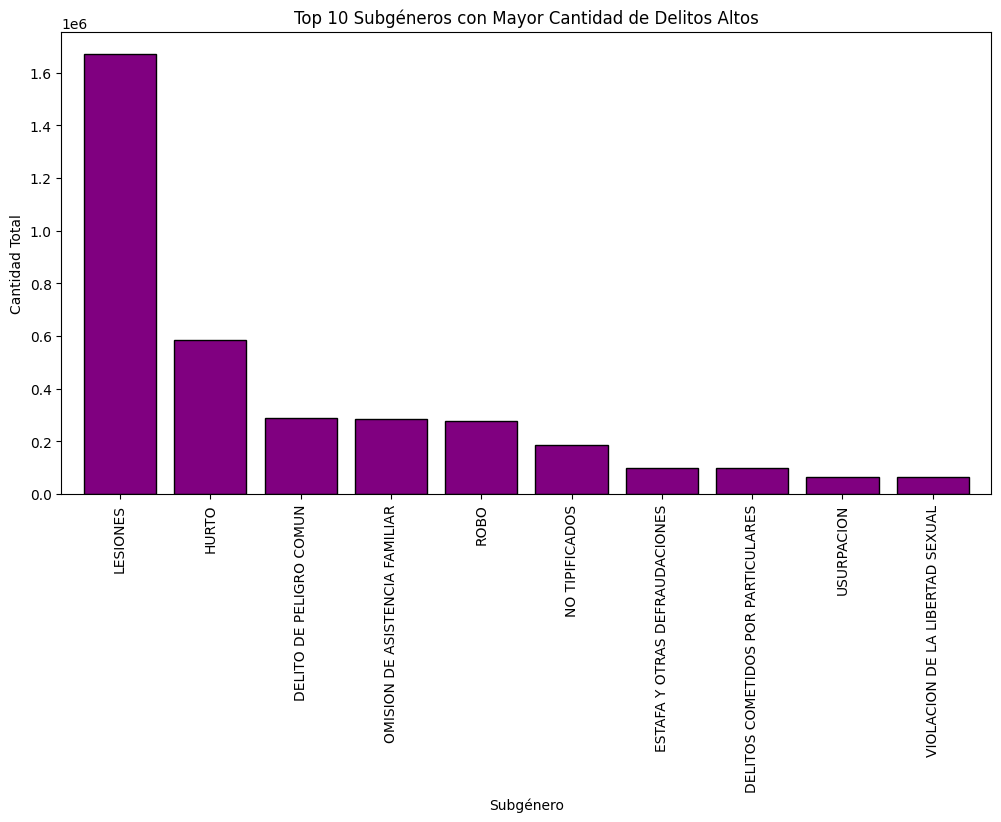

In [14]:
# Filtrar los 10 subgéneros con la mayor cantidad
top_10_subgenerico = df_alta_cantidad.groupby('subgenerico')['cantidad'].sum().sort_values(ascending=False).head(10)

# Gráfico de barras para ver la cantidad total por 'subgenerico' en los datos filtrados
plt.figure(figsize=(12, 6))
top_10_subgenerico.plot(kind='bar', color='purple', edgecolor='black', width=0.8)  # Ajustar el ancho
plt.title('Top 10 Subgéneros con Mayor Cantidad de Delitos Altos')
plt.xlabel('Subgénero')
plt.ylabel('Cantidad Total')
plt.xticks(rotation=90)
plt.show()


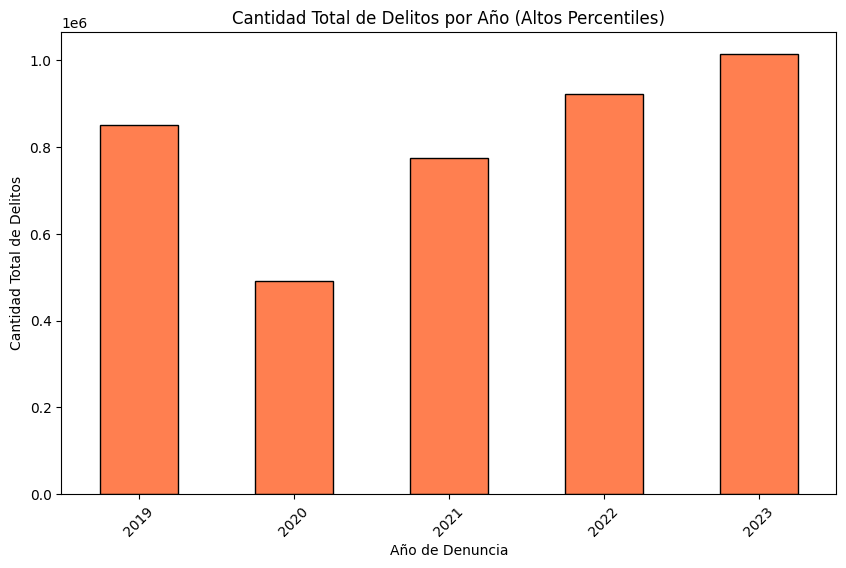

In [15]:
# Gráfico de barras para la cantidad de delitos por año de denuncia en el conjunto filtrado por percentil
plt.figure(figsize=(10, 6))
df_alta_cantidad.groupby('anio_denuncia')['cantidad'].sum().plot(kind='bar', color='coral', edgecolor='black')
plt.title('Cantidad Total de Delitos por Año (Altos Percentiles)')
plt.xlabel('Año de Denuncia')
plt.ylabel('Cantidad Total de Delitos')
plt.xticks(rotation=45)
plt.show()



In [16]:
# Agrupar por departamento y sumar la cantidad de delitos en el conjunto filtrado por percentil
delitos_por_departamento = df_alta_cantidad.groupby('dpto_pjfs')['cantidad'].sum().sort_values(ascending=False)

# Mostrar los primeros 10 resultados
print(delitos_por_departamento.head(10))


dpto_pjfs
LIMA           1423262
LAMBAYEQUE      311461
AREQUIPA        268377
LA LIBERTAD     226501
PIURA           206840
CALLAO          190943
JUNIN           183161
CUSCO           170473
ICA             155932
ANCASH          150236
Name: cantidad, dtype: int64


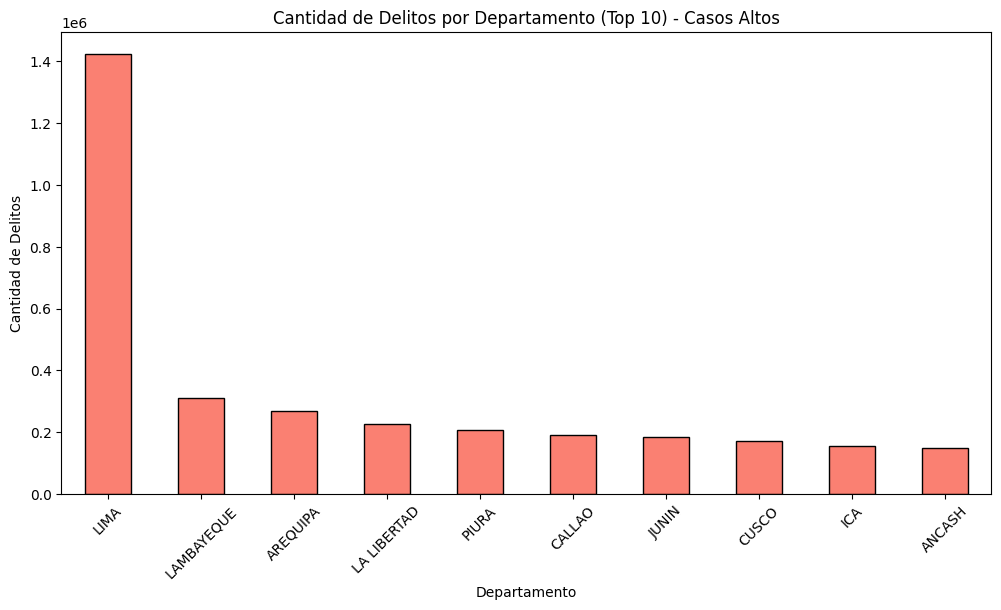

In [17]:
# Agrupar por departamento en el subset filtrado y sumar la cantidad de delitos
delitos_por_departamento = df_alta_cantidad.groupby('dpto_pjfs')['cantidad'].sum().sort_values(ascending=False)

# Gráfico de barras de delitos por departamento para el Top 10
plt.figure(figsize=(12, 6))
delitos_por_departamento.head(10).plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Cantidad de Delitos por Departamento (Top 10) - Casos Altos')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de Delitos')
plt.xticks(rotation=45)
plt.show()



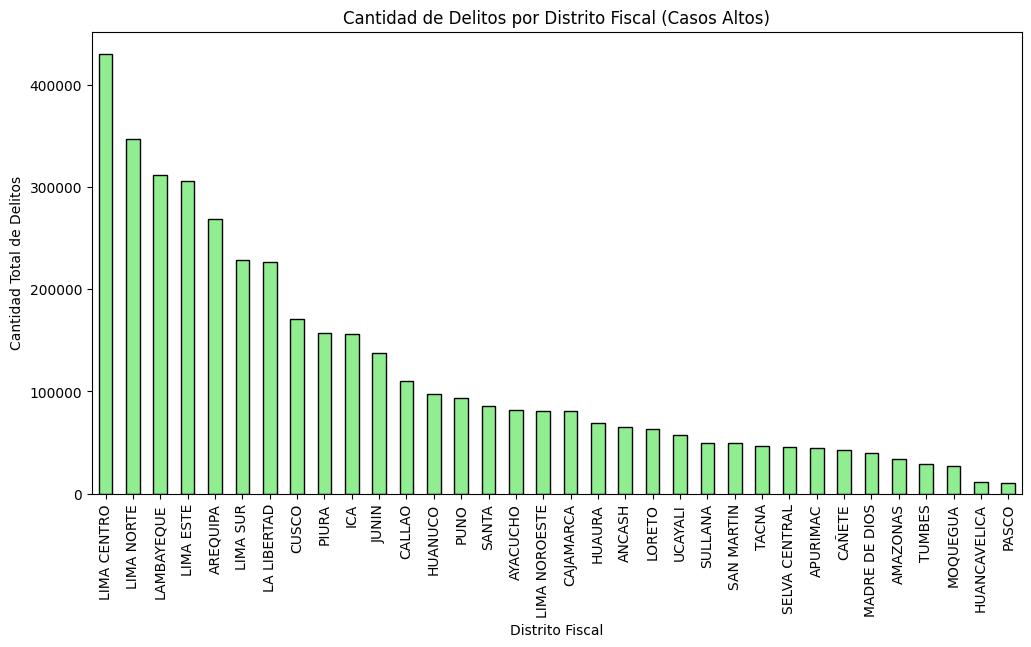

In [18]:
# Agrupar por distrito fiscal en el subset filtrado y sumar la cantidad de delitos
delitos_por_distrito = df_alta_cantidad.groupby('distrito_fiscal')['cantidad'].sum().sort_values(ascending=False)

# Gráfico de barras para la cantidad de delitos por distrito fiscal en los casos altos
plt.figure(figsize=(12, 6))
delitos_por_distrito.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Cantidad de Delitos por Distrito Fiscal (Casos Altos)')
plt.xlabel('Distrito Fiscal')
plt.ylabel('Cantidad Total de Delitos')
plt.xticks(rotation=90)
plt.show()



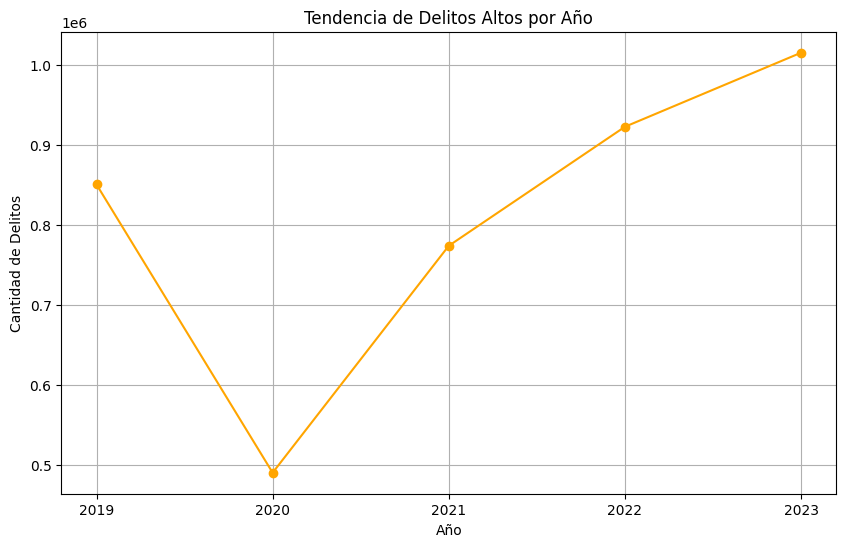

In [19]:
# Agrupar datos por año (anio_denuncia) y sumar la cantidad de delitos en el subset filtrado
delitos_por_anio = df_alta_cantidad.groupby('anio_denuncia')['cantidad'].sum()

# Graficar la tendencia de delitos por año
plt.figure(figsize=(10, 6))
delitos_por_anio.plot(kind='line', marker='o', color='orange')
plt.title('Tendencia de Delitos Altos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Delitos')
plt.xticks(delitos_por_anio.index)  # Mostrar todos los años en el eje x
plt.grid(True)
plt.show()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kevin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Palabras más comunes: [('ilegal', 2784), ('delitos', 2758), ('formas', 2315), ('violación', 2198), ('agravadas', 2175), ('sexual', 2072), ('autoridad', 1934), ('tráfico', 1848), ('funcionarios', 1705), ('corrupción', 1615)]


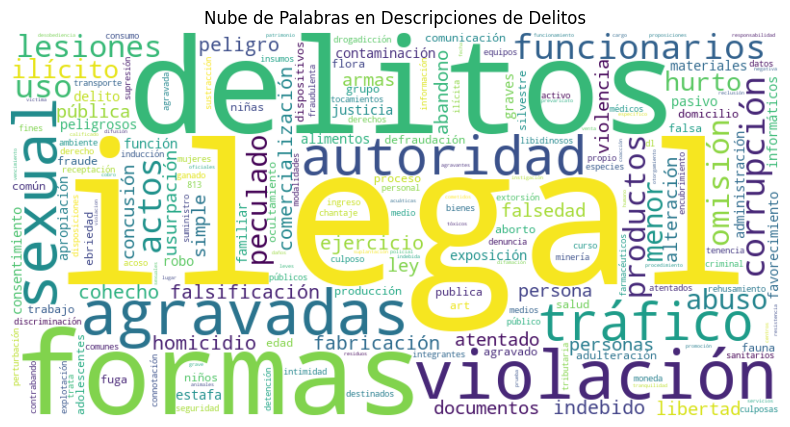

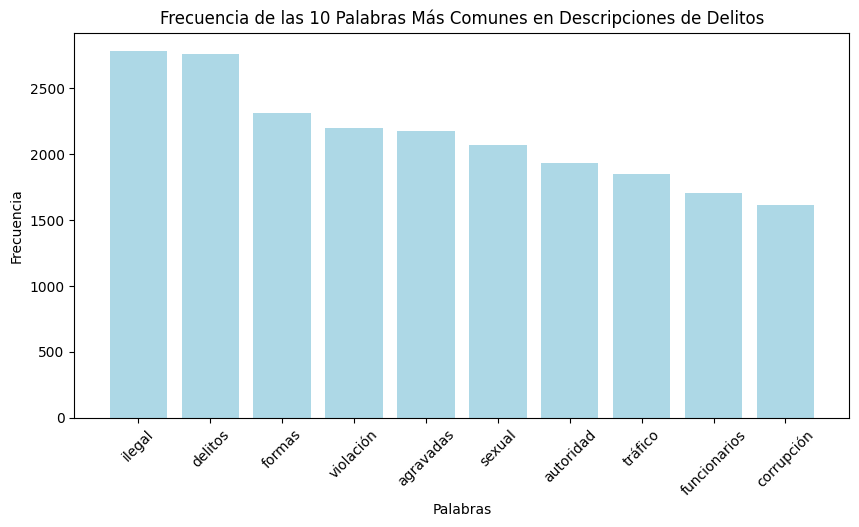

In [22]:
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

# Asegúrate de haber descargado las stopwords de nltk
nltk.download('stopwords')

# Leer el DataFrame (asumiendo que ya lo tienes cargado como df_delitos)
# df_delitos = pd.read_csv('ruta/al/archivo/delitos.csv')

# Limpieza de texto
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

# Aplicar la limpieza a la columna de descripción
df_delitos['descripcion_limpia'] = df_delitos['des_articulo'].apply(clean_text)

# Tokenizar las palabras y eliminar stopwords
stop_words = set(stopwords.words('spanish'))  # Usa 'english' si tus datos están en inglés
words = [word for desc in df_delitos['descripcion_limpia'] for word in desc.split() if word not in stop_words]

# Contar la frecuencia de palabras
word_counts = Counter(words)

# Obtener las 10 palabras más comunes
most_common_words = word_counts.most_common(10)

# Mostrar los resultados
print("Palabras más comunes:", most_common_words)

# Visualización de la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras en Descripciones de Delitos')
plt.show()

# Gráfico de barras para las 10 palabras más comunes
plt.figure(figsize=(10, 5))
plt.bar(*zip(*most_common_words), color='lightblue')
plt.title('Frecuencia de las 10 Palabras Más Comunes en Descripciones de Delitos')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


In [23]:
# Guardar el DataFrame limpio en un archivo CSV
df_delitos.to_csv('delitos_limpios.csv', index=False)

In [24]:
# Finalizar el análisis
print("Análisis de delitos en Perú (2019-2023) completado.")

Análisis de delitos en Perú (2019-2023) completado.
